In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

In [3]:
NB = 40
OBDIST = 0.2

X = np.zeros(NB,dtype=float)
Y = np.zeros(NB,dtype=float)
Z = np.zeros(NB,dtype=float)

In [4]:
XO = []
YO = []
ZO = []

In [5]:
relativeDistance = lambda xi,xj,yi,yj,zi,zj: np.sqrt((xi-xj)**2 + (yi-yj)**2 + (zi-zj)**2)
objectiveFit = lambda di,dj: np.sqrt((di-dj)**2)

<IPython.core.display.Javascript object>


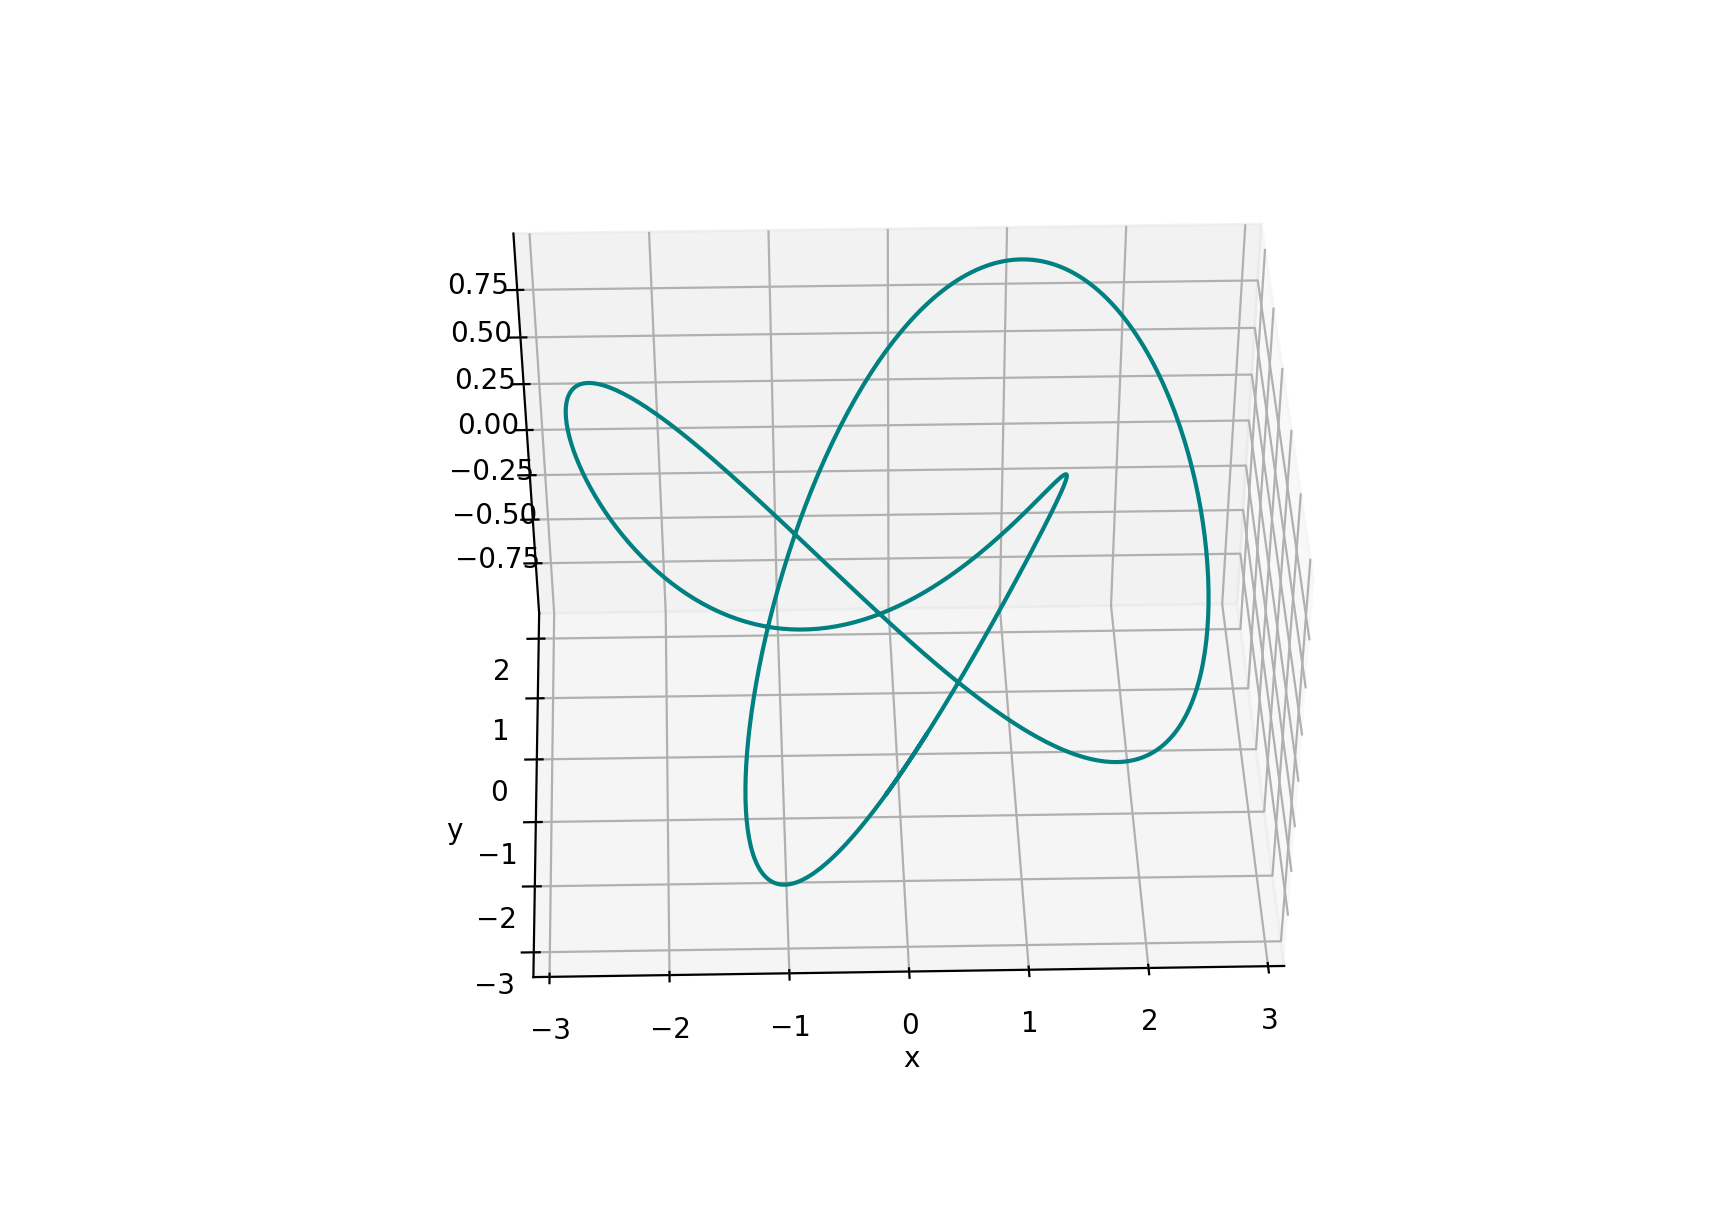

In [6]:
dt = 0.01
t = np.arange(-3.2,3.2,dt)

"""
XC = (4/5) * t * (t**2 -6) * (t**2 -12)
YC = t**2 * (t**2 -7)*(t**2 - 9)
ZC = (1/200) * t *(t**2 - 0.2) *(t**2 - 1)*(t**2 - 5)*(t**2 - 6.5)*(t**2 - 9)*(t**2-10)
"""


XC = np.sin(t)+2*np.sin(2*t)
YC = np.cos(t) - 2 * np.cos(2*t)
ZC = -np.sin(3*t)


"""
XC = np.sin(t) + 2*np.sin(2*t)
YC = np.cos(t) - 2*np.cos(2*t)
ZC = np.sin(3*t)
"""

"""
RC1 = 1.0
RC2 = 1.0
XC = -RC1*np.cos(t)
YC = RC2*np.sin(t)
ZC = t
"""
f = np.ones(len(t))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(XC, YC, ZC,'teal')
plt.xlabel('x')
plt.ylabel('y')

#ax.plot3D(-3*f, YC, ZC,'tab:red',alpha=0.3)
#ax.plot3D(XC, f, ZC,'tab:blue',alpha=0.3)
#ax.plot3D(XC, YC, f,'tab:green',alpha=0.3)
plt.show()

In [7]:
#map the backbone into the objective curve
index = 0
for nb in range(NB):
    
    #fit the coordinates of the first backbone atom
    #to the beginning of the curve
    
    if nb == 0:
        X[nb] = XC[0]
        Y[nb] = YC[0]
        Z[nb] = ZC[0]
        
    else:
        
        fit_arr = np.zeros(len(XC),dtype=float)
        
        for pc in range(len(XC)):
            
            if pc <= index:
                fit_arr[pc] = 10000000000.0
            elif pc > (index + (OBDIST/dt) + 4):
                fit_arr[pc]= 100000000000.0
            else:    
                rd = relativeDistance(XC[pc],X[nb-1],YC[pc],Y[nb-1],ZC[pc],Z[nb-1])
                od = objectiveFit(rd,OBDIST)
                fit_arr[pc] = od
        #print(fit_arr)
                
        index = np.argmin(fit_arr)
        X[nb] = XC[index]
        Y[nb] = YC[index]
        Z[nb] = ZC[index]
                
        #print(fit_arr)

<IPython.core.display.Javascript object>


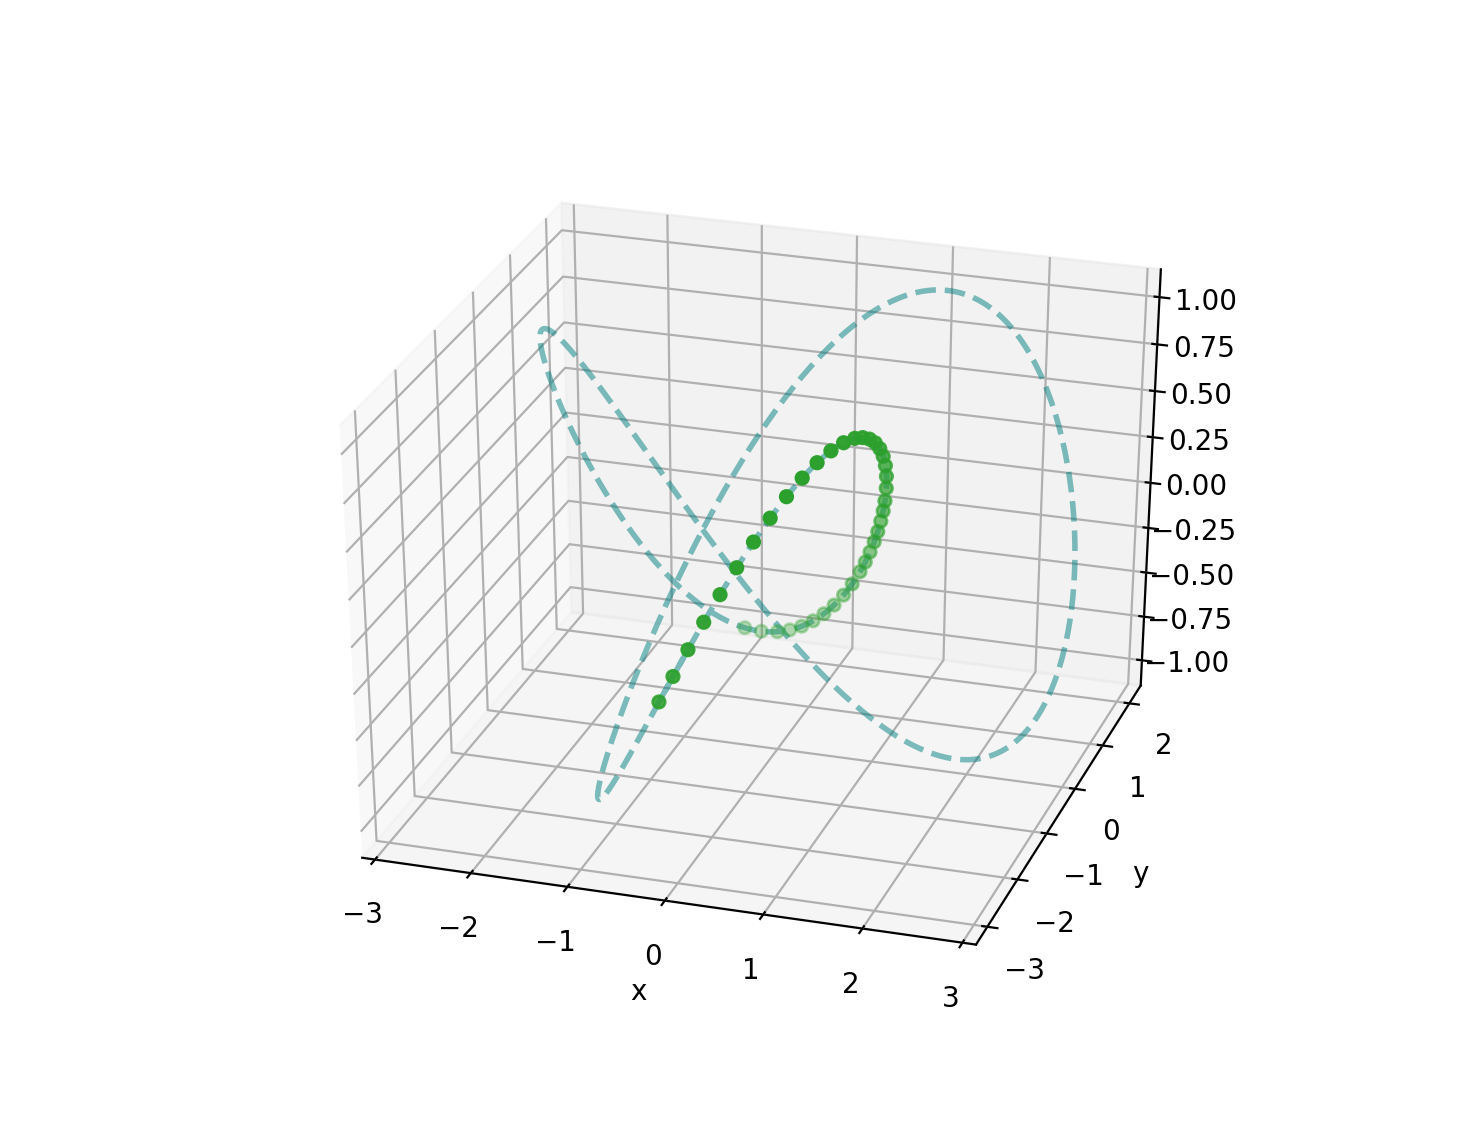

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z, 'o', c = 'tab:green')
ax.plot3D(XC, YC, ZC, 'teal',ls='--',lw=2, alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
phi = np.zeros(nb-1)
theta = np.zeros(nb-1)
for i in range(nb-1):
    
    x = X[i+1] - X[i]
    y = Y[i+1] - Y[i]
    z = Z[i+1] - Z[i]
    
    if y <0 and x < 0:
        c = -1
        cs = np.pi
    elif x > 0 and y < 0:
        cs = np.pi
        c=-1
    else: 
        cs = 0
        c=1
        
    r1 = np.sqrt(x**2 + y**2)
    r2 = np.sqrt(r1**2 + z**2)
    
    phi[i] = np.arccos(np.dot([c*x/r1,c*y/r1],[1,0])) +cs
    theta[i] = np.arccos(np.dot(z/r2,r1/r2))

<IPython.core.display.Javascript object>


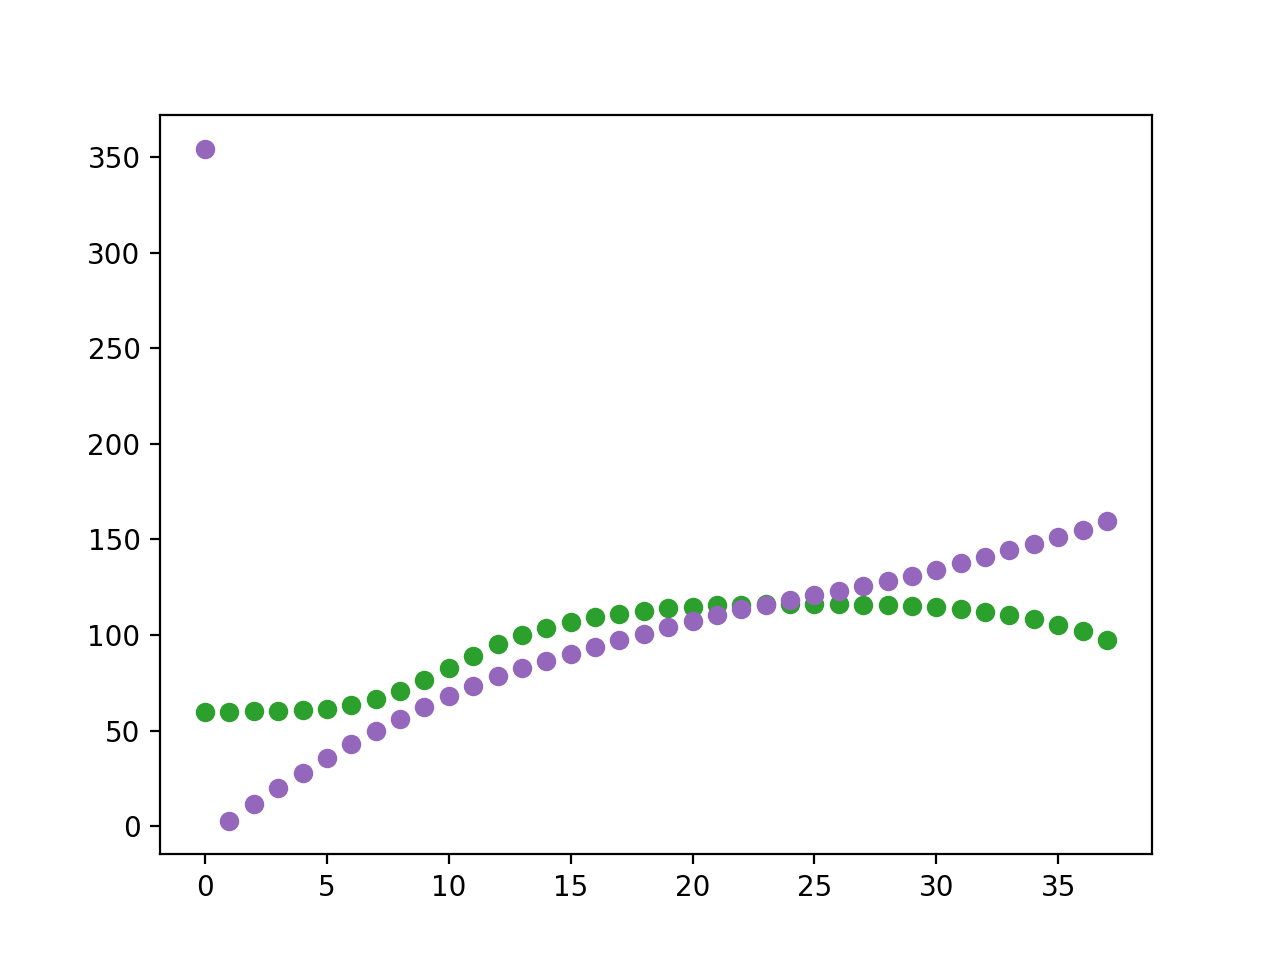

In [10]:
fig = plt.figure()
plt.plot(range(len(theta)),180*theta/np.pi,'o',c = 'tab:green')
plt.plot(range(len(phi)),180*phi/np.pi,'o',c = 'tab:purple')
plt.show()

In [15]:
print(phi)

[4.81884823 4.81531715 4.81151582 4.8074182  4.80299491 4.79568432
 4.78443689 4.77111581 4.75519106 0.55277405 0.80490285 0.87045224
 0.92512082 0.97579705 1.02310675 1.06765496 1.1100299  1.15081393
 1.19060069 1.23001915 1.26976673 1.31482385 1.3671729  1.42513531
 1.49827727 1.59697364 1.74281996 2.02314326 2.67793141 3.44025119
 3.7647362  3.89692729 3.97045044 4.02208358 4.05958871 4.0874123
 4.11104804 4.13118708]


<IPython.core.display.Javascript object>


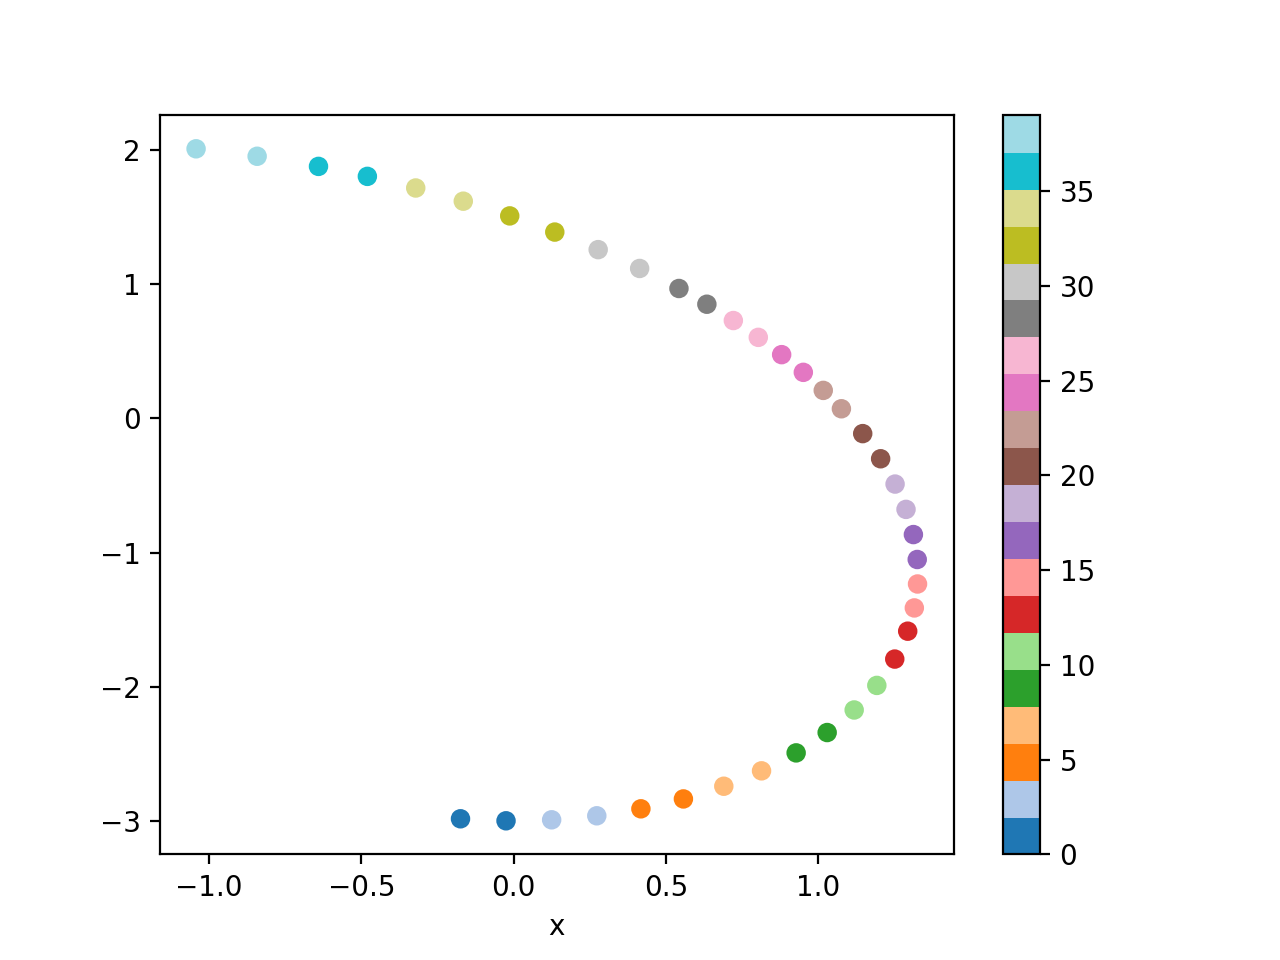

In [11]:
fig = plt.figure()
tt=np.arange(len(X))
plt.scatter(X,Y,c=tt,cmap='tab20')
plt.xlabel('x')
plt.colorbar()
plt.show()